In this notebook I am analysing House Prices data to predict the price of house. 
So this notebook contains the following in the mentioned order:
* Also used heatmap to look for correlation of variables with all the other variables and looked for those that seemed important
* Then correct the data for missing values and outliers.
* See that if the variables satisfy the prerequiusite conditions for linear regression.
* Used Linear regression model to predict the price.

In [156]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import GridSearchCV
from scipy import stats
from sklearn.model_selection import train_test_split

In [157]:
data= r'C:\Users\bhardwaj\Downloads\house-prices-advanced-regression-techniques\train.csv'

In [158]:
df=pd.read_csv(data)

In [159]:
df=df.set_index('Id') #Setting ID as index of the data.

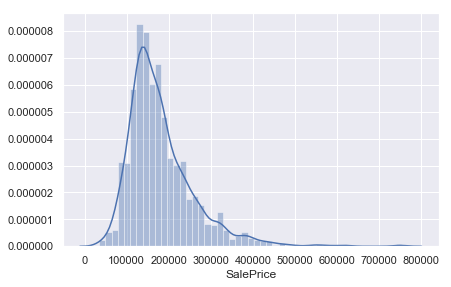

In [160]:
sns.distplot(df['SalePrice'])

In [161]:
df['SalePrice']

Id
1       208500
2       181500
3       223500
4       140000
5       250000
6       143000
7       307000
8       200000
9       129900
10      118000
11      129500
12      345000
13      144000
14      279500
15      157000
16      132000
17      149000
18       90000
19      159000
20      139000
21      325300
22      139400
23      230000
24      129900
25      154000
26      256300
27      134800
28      306000
29      207500
30       68500
         ...  
1431    192140
1432    143750
1433     64500
1434    186500
1435    160000
1436    174000
1437    120500
1438    394617
1439    149700
1440    197000
1441    191000
1442    149300
1443    310000
1444    121000
1445    179600
1446    129000
1447    157900
1448    240000
1449    112000
1450     92000
1451    136000
1452    287090
1453    145000
1454     84500
1455    185000
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1460, dtype: int64

The distribution of SalePrice shows following properties:
* Skewed to the right and not a normal distribution. 
* Also it has peakedness.

In [162]:
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


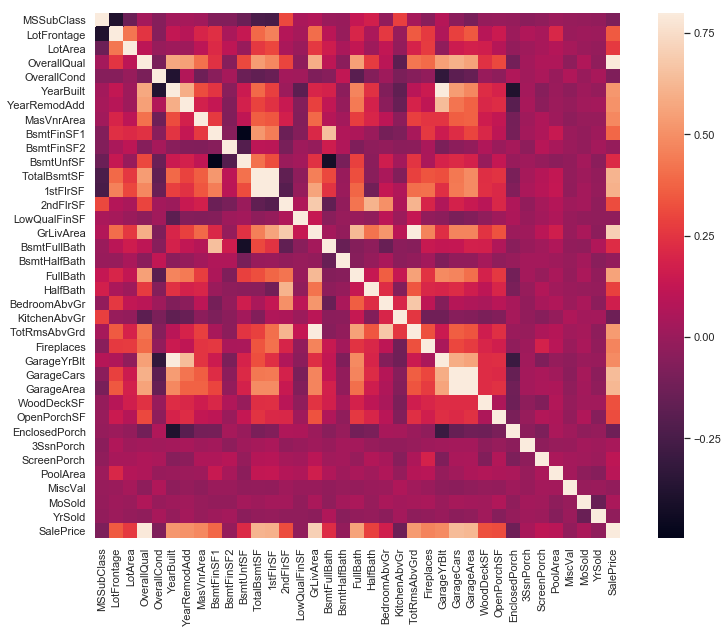

In [163]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Above, OverallQual, GrLivArea, YearBuilt, YearRemodAdd, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, GarageCars,GarageArea shows high correlation with Sale price.

In [164]:
cols=df[['OverallQual','GrLivArea', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea','SalePrice']]

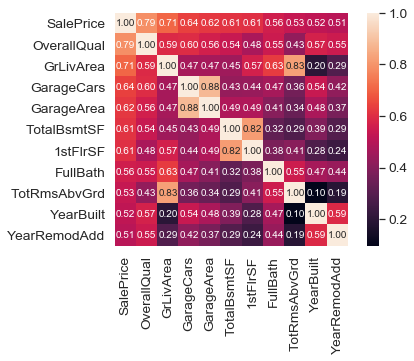

In [165]:
cols = corrmat.nlargest(11, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

C:\Users\bhardwaj\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


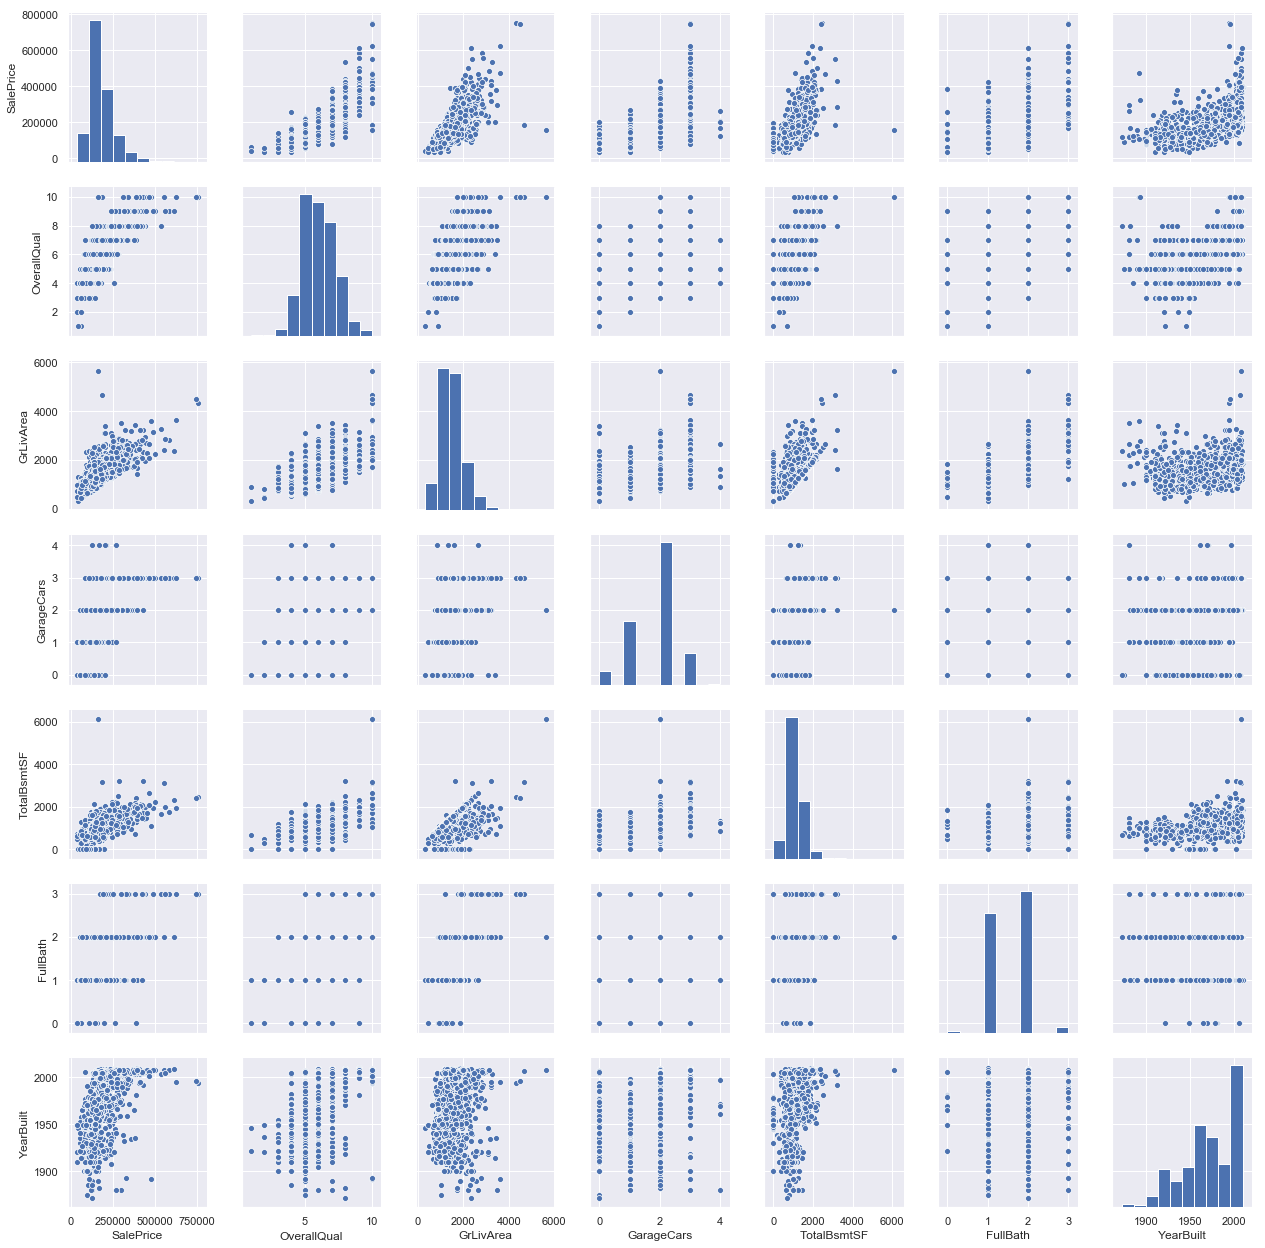

In [166]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size = 2.5)
plt.show()

In [167]:
df['SalePrice']

Id
1       208500
2       181500
3       223500
4       140000
5       250000
6       143000
7       307000
8       200000
9       129900
10      118000
11      129500
12      345000
13      144000
14      279500
15      157000
16      132000
17      149000
18       90000
19      159000
20      139000
21      325300
22      139400
23      230000
24      129900
25      154000
26      256300
27      134800
28      306000
29      207500
30       68500
         ...  
1431    192140
1432    143750
1433     64500
1434    186500
1435    160000
1436    174000
1437    120500
1438    394617
1439    149700
1440    197000
1441    191000
1442    149300
1443    310000
1444    121000
1445    179600
1446    129000
1447    157900
1448    240000
1449    112000
1450     92000
1451    136000
1452    287090
1453    145000
1454     84500
1455    185000
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1460, dtype: int64

In [168]:
scaler=StandardScaler()
df["saleprice_scaled"]=scaler.fit_transform(df['SalePrice'][:,np.newaxis]);

C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


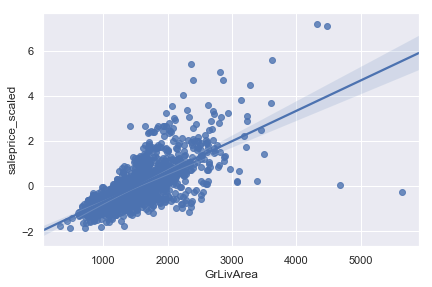

In [169]:
sns.regplot(x="GrLivArea",y="saleprice_scaled",data=df)

In [170]:
df.sort_values(by = 'GrLivArea', ascending = False)[:2]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,saleprice_scaled
Id,,,,,,,,,,,,,,,,,,,,,
1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,Gd,NaN,NaN,0,1,2008,New,Partial,160000,-0.263440
524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,...,NaN,NaN,NaN,0,10,2007,New,Partial,184750,0.048212


In [171]:
df = df.drop(1299)
df= df.drop(524)

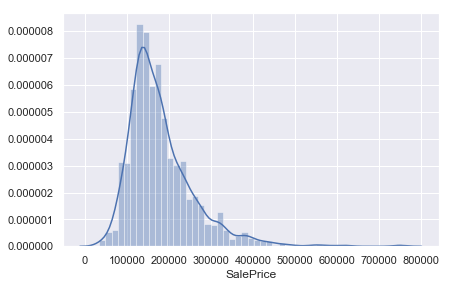

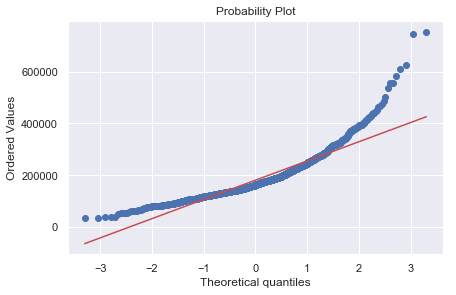

In [172]:
sns.distplot(df['SalePrice']);
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)

In [173]:
df['logsaleprice']=np.log(df['SalePrice'])

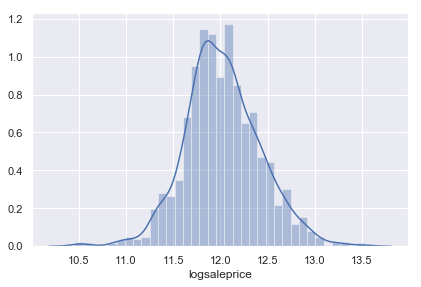

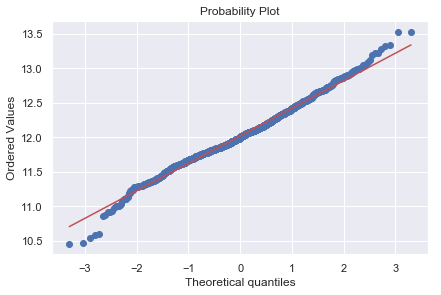

In [175]:
sns.distplot(df['logsaleprice'],norm_hist=True);
fig = plt.figure()
res = stats.probplot(df['logsaleprice'], plot=plt)

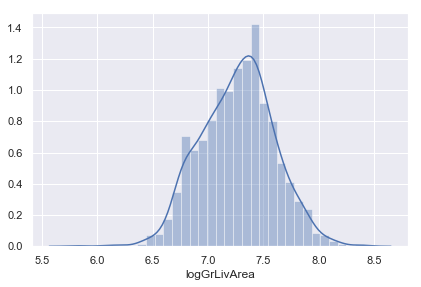

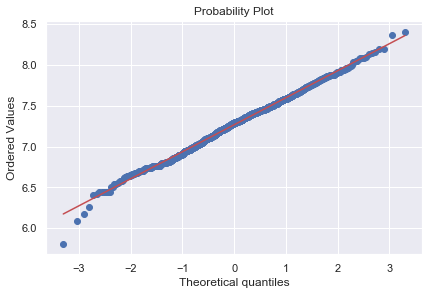

In [176]:
df['logGrLivArea']=np.log(df['GrLivArea'])
sns.distplot(df['logGrLivArea'],norm_hist=True);
fig = plt.figure()
res = stats.probplot(df['logGrLivArea'], plot=plt)

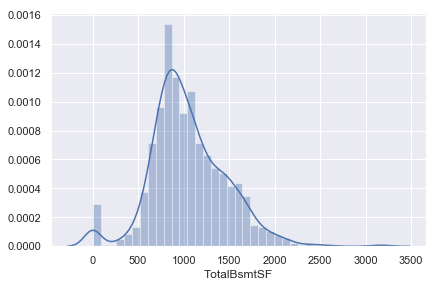

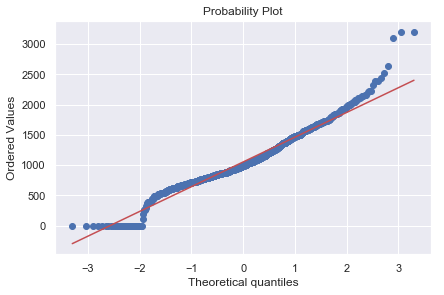

In [177]:
#df['logTotalBsmtSF']=np.log(df['TotalBsmtSF'])
sns.distplot(df['TotalBsmtSF'],norm_hist=True);
fig = plt.figure()
res = stats.probplot(df['TotalBsmtSF'], plot=plt)

In [178]:
df['logTotalBsmtSF']=np.log1p(df['TotalBsmtSF'])

In [179]:
df['TotalBsmtSF'].value_counts()

0       37
864     35
672     17
912     15
1040    14
816     13
728     12
768     12
780     11
894     11
848     11
832     10
952      9
630      9
756      9
1056     8
936      8
483      7
720      7
384      7
1008     7
600      7
840      7
858      6
884      6
876      6
1362     6
1392     6
796      6
928      5
        ..
1202     1
1203     1
1205     1
1210     1
1215     1
1218     1
1219     1
1221     1
1223     1
1224     1
1225     1
1226     1
1235     1
1241     1
1242     1
1244     1
1246     1
1247     1
1251     1
1253     1
1257     1
1260     1
1261     1
1266     1
1267     1
1269     1
1271     1
1272     1
1273     1
1098     1
Name: TotalBsmtSF, Length: 719, dtype: int64

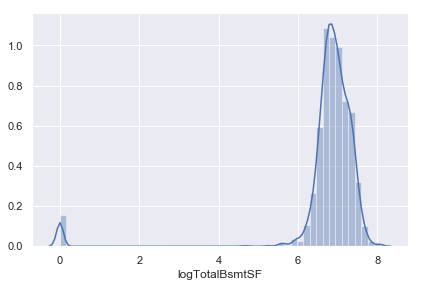

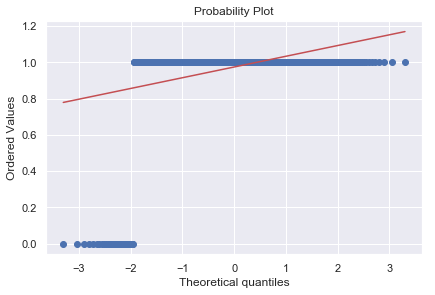

In [182]:
sns.distplot(df['logTotalBsmtSF']);
fig = plt.figure()
res = stats.probplot((df['logTotalBsmtSF']>0), plot=plt)

In [183]:
FullBath=pd.get_dummies(df['FullBath'])
df=pd.concat((df,FullBath),axis=1)

In [184]:
df['GarageCars'].value_counts()

2    823
1    369
3    180
0     81
4      5
Name: GarageCars, dtype: int64

In [185]:
df.rename(columns={0:'fb0',1:'fb1',2:'fb2', 3:'fb3'}, inplace=True)

In [186]:
df=pd.concat((df,pd.get_dummies(df['GarageCars'])),axis=1)
df.rename(columns={0:'GC0',1:'GC1',2:'GC2', 3:'GC3',4:'GC4'}, inplace=True)

In [187]:
cols1 = ['OverallQual', 'GrLivArea','fb0','fb1','fb2','fb3','TotalBsmtSF','GC0','GC1','GC2','GC3','GC4','YearBuilt']

In [188]:
X=df[cols1]

In [189]:
y=df['SalePrice']

In [190]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3)

In [191]:
reg = LinearRegression().fit(Xtrain,ytrain)

In [192]:
pred=reg.predict(Xtest)

In [193]:
print(r2_score(ytest,pred))

0.8366818000909526


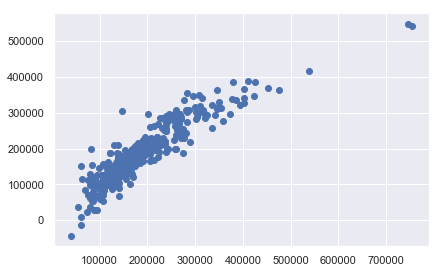

In [194]:
plt.scatter(ytest,pred)

In [195]:
scores = cross_val_score(reg,Xtrain, ytrain, cv=5)
print ("Cross-validated scores:", scores)
print ("Average Cross-validated score:", scores.mean())

Cross-validated scores: [0.79973569 0.83470445 0.83804406 0.80824839 0.84248485]
Average Cross-validated score: 0.8246434867500481


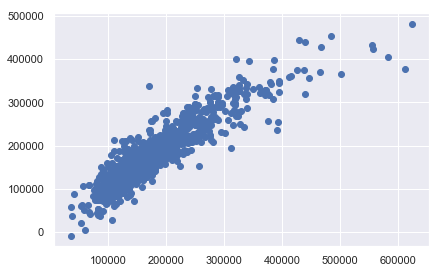

In [196]:
predictions = cross_val_predict(reg, Xtrain, ytrain, cv=5)
plt.scatter(ytrain, predictions)

(array([  3.,  20., 105., 157.,  79.,  47.,  21.,   4.,   0.,   2.]),
 array([-43009.66858622,  16210.5119082 ,  75430.69240262, 134650.87289704,
        193871.05339146, 253091.23388588, 312311.4143803 , 371531.59487472,
        430751.77536914, 489971.95586356, 549192.13635798]),
 <a list of 10 Patch objects>)

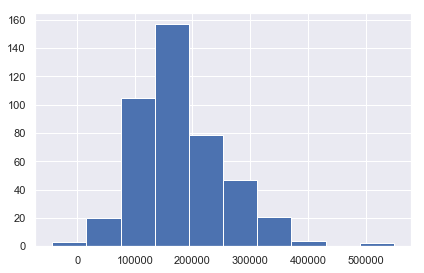

In [197]:
plt.hist(reg.predict(Xtest))

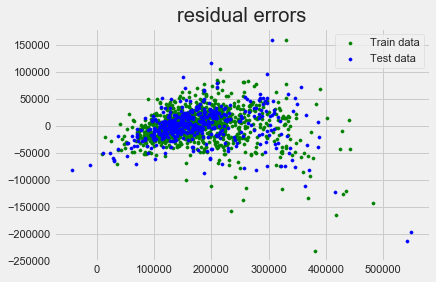

In [198]:
plt.style.use('fivethirtyeight')
plt.scatter(reg.predict(Xtrain),reg.predict(Xtrain)-ytrain,color='green',s=10,label="Train data")
plt.scatter(reg.predict(Xtest),reg.predict(Xtest)-ytest,color='Blue',s=10,label="Test data")
plt.hlines(y=0,xmin=0,xmax=50,linewidth=2)
plt.legend(loc='upper right')
plt.title('residual errors')
plt.show()